In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
url = "/content/advertising.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

<Axes: >

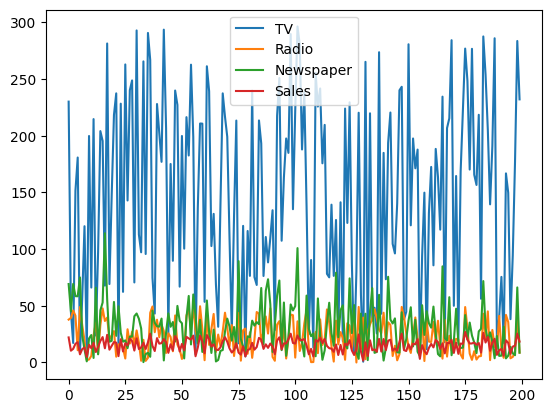

In [8]:
df.plot()

Text(0, 0.5, 'Sales')

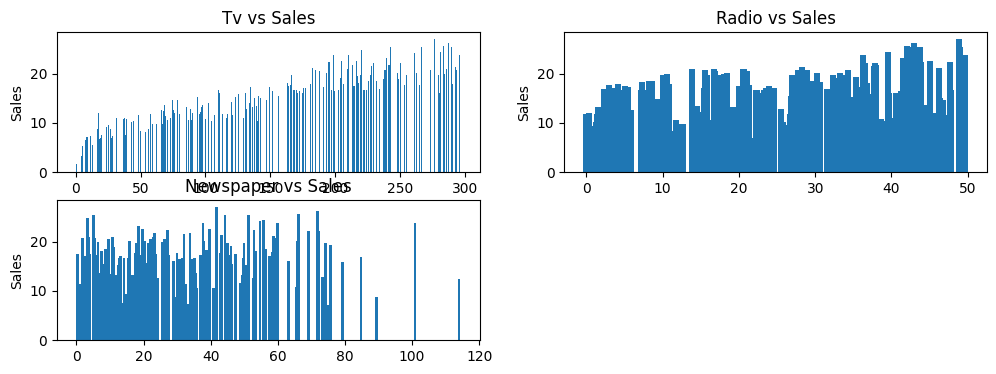

In [9]:

plt.figure(figsize = (12,4))
plt.subplot(2,2,1)
plt.bar(df['TV'],df['Sales'])
plt.ylabel("Sales")
plt.title("Tv vs Sales")
plt.subplot(2,2,2)
plt.bar(df['Radio'],df['Sales'])
plt.title("Radio vs Sales")
plt.ylabel("Sales")
plt.subplot(2,2,3)
plt.bar(df['Newspaper'],df['Sales'])
plt.title("Newspaper vs Sales")
plt.ylabel("Sales")

Text(0.5, 1.0, 'Sales Pattern')

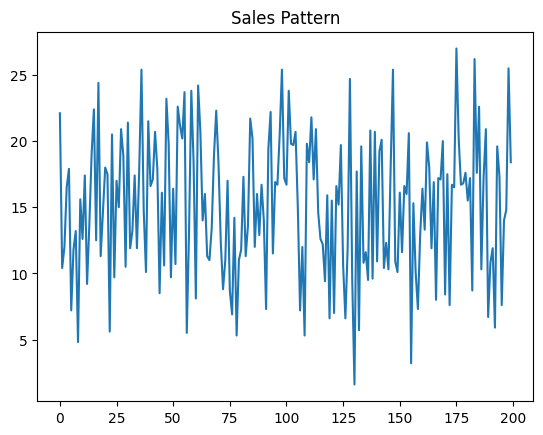

In [10]:
df['Sales'].plot()
plt.title('Sales Pattern')

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
corr = df.corr()


<Axes: >

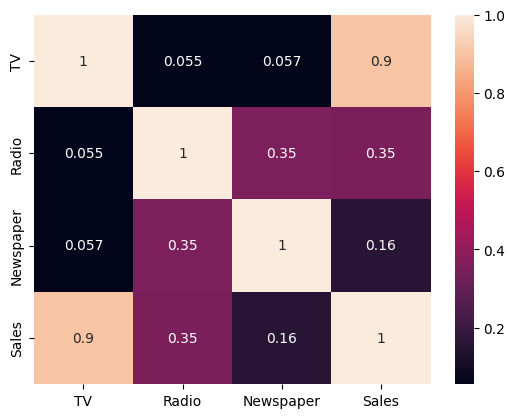

In [13]:
sns.heatmap(corr,annot = True)

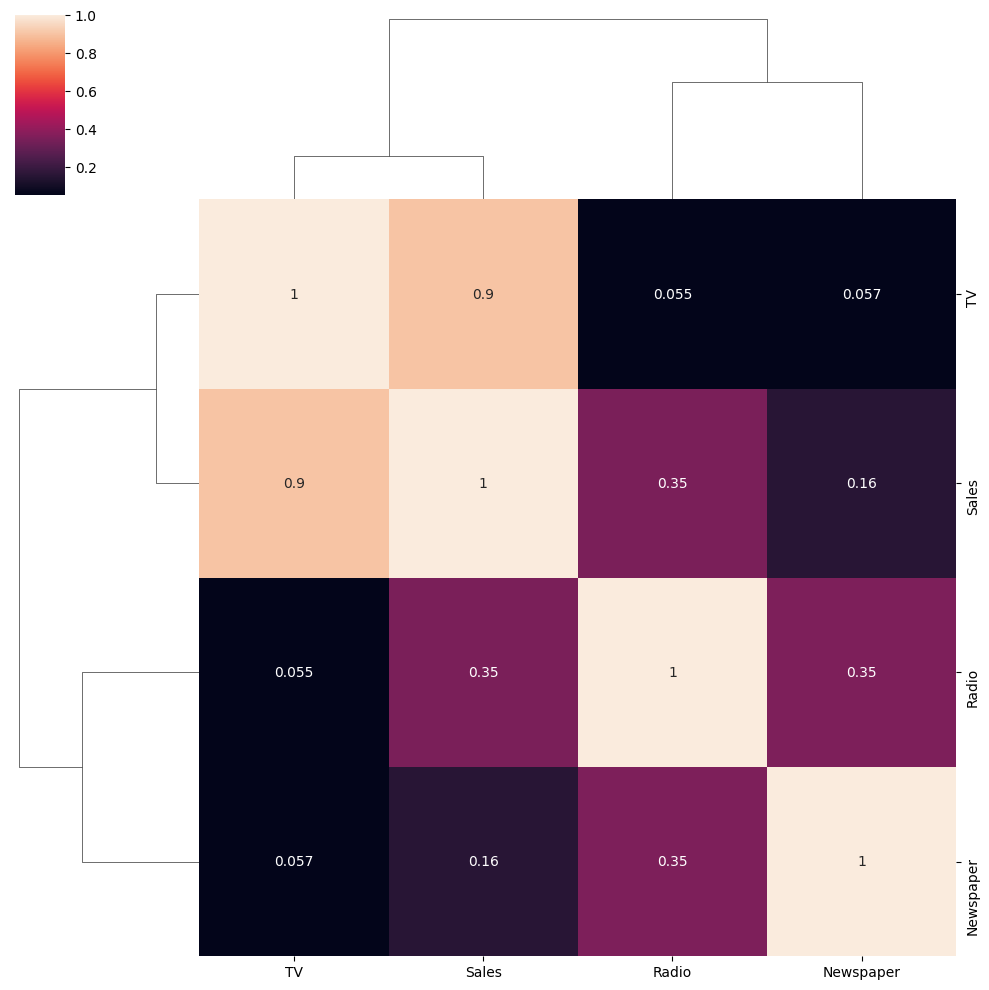

In [14]:

sns.clustermap(corr, annot = True)

In [15]:
print("From this we can understand that TV is closely related to Sales ")

From this we can understand that TV is closely related to Sales 


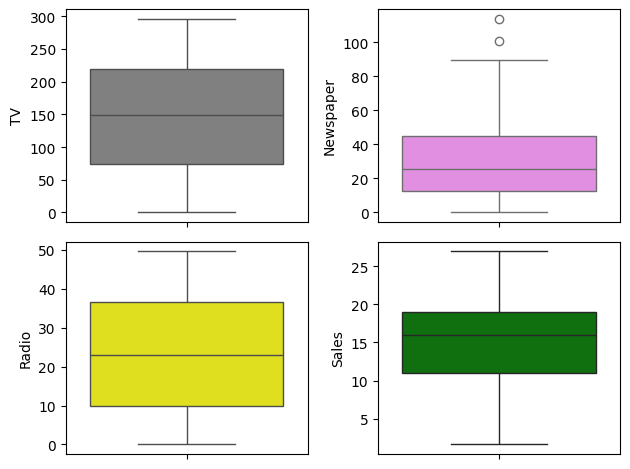

In [16]:
plt.subplot(2,2,1)
sns.boxplot(df['TV'],color = 'grey')
plt.subplot(2,2,2)
sns.boxplot(df['Newspaper'],color = 'Violet')
plt.subplot(2,2,3)
sns.boxplot(df['Radio'],color = 'yellow')
plt.subplot(2,2,4)
sns.boxplot(df['Sales'],color = 'Green')
plt.tight_layout()

Text(0.5, 1.0, 'TV Freq')

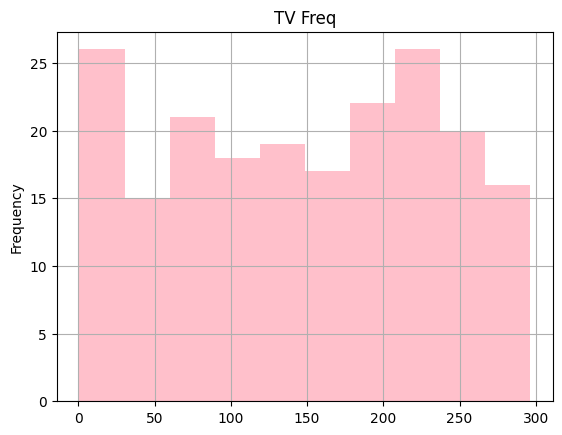

In [17]:
df['TV'].hist(color = 'Pink')
plt.ylabel('Frequency')
plt.title("TV Freq")


<BarContainer object of 200 artists>

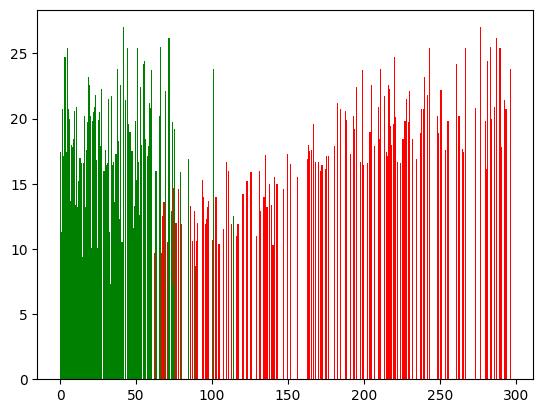

In [18]:
plt.bar(df['TV'],df['Sales'],color = 'Red',label = 'TV w Sales')
plt.bar(df['Newspaper'],df['Sales'],color = 'Green',label = 'Newspaper w Sales')


In [19]:

salemax = df['Sales'].max()
salemax

27.0

In [20]:
maxtv = df['TV'][salemax]
maxrad = df['Radio'][salemax]
maxnews = df['Newspaper'][salemax]

In [21]:
salemin = df['Sales'].min()

salemin

1.6

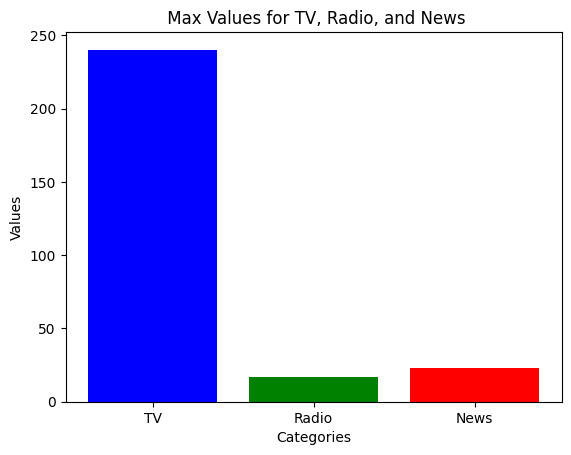

In [22]:
categories = ['TV', 'Radio', 'News']

# Values for the bars
values = [maxtv, maxrad, maxnews]

# Plotting the bar graph
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title(' Max Values for TV, Radio, and News')
plt.show()

In [23]:
values = [df['TV'].mean(),df['Radio'].mean(),df['Newspaper'].mean()]
leg = ['TV','Radio','Newspaper']

Text(0.5, 1.0, 'Mean percentatge values')

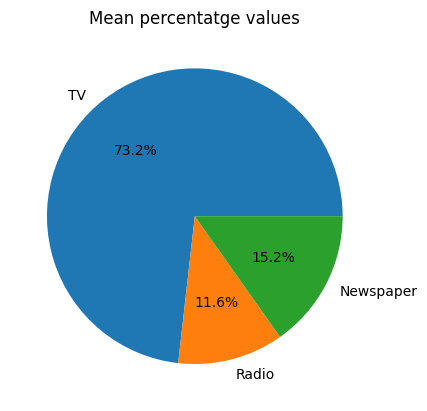

In [24]:
plt.pie(values,labels = leg,autopct = "%1.1f%%")
plt.title("Mean percentatge values")

In [25]:
reg = LinearRegression()

In [26]:
x = df.drop(columns = ['Sales'])
y = df['Sales']

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [28]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [29]:
ypred = reg.predict(xtest)

In [30]:
print(ypred)

[21.37857185  9.92802386  9.16306818 10.72013061 17.74274471 19.31977589
 15.22971342 20.91720652  7.79236629 16.42895431 24.29056891 10.51847808
 11.68411659 10.53523293 10.88699253 13.13784242 15.94494016 10.63651189
  8.83836828 12.68534225 15.8310773   9.80741453  7.92717698  7.11424853
 16.51643711 10.05540579 24.92329005  6.1394441  11.05015102 12.14605184
  8.19108948 16.90050668 13.7228728  18.64607932 10.22275817 12.34958575
 12.22340666 20.17814365 20.63443339 15.24275684]


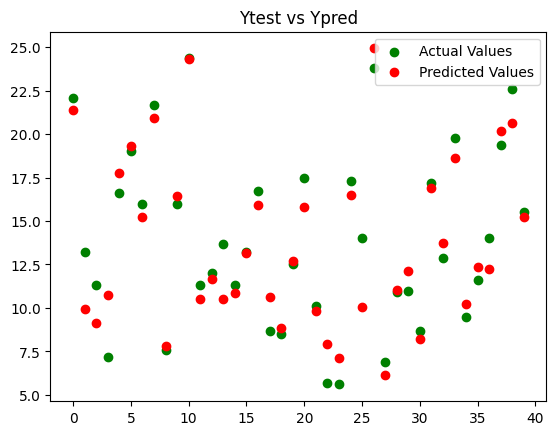

In [31]:
plt.scatter(range(0,len(ytest)),ytest,color = 'Green',label = 'Actual Values')
plt.scatter(range(0,len(ytest)),ypred,color = 'red',label = 'Predicted Values')
plt.title("Ytest vs Ypred")
plt.legend()
sns.set_theme()

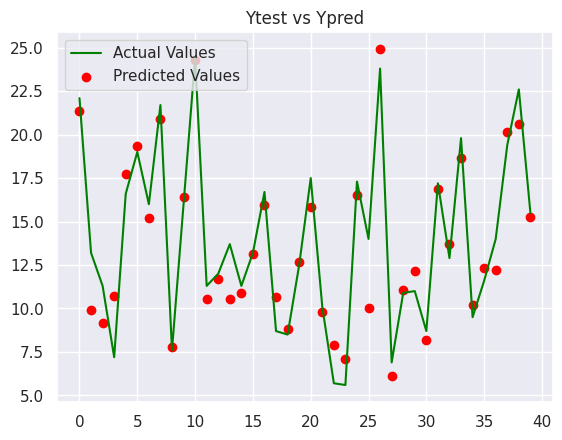

In [32]:
plt.plot(range(0,len(ytest)),ytest,color = 'Green',label = 'Actual Values')
plt.scatter(range(0,len(ytest)),ypred,color = 'red',label = 'Predicted Values')
plt.title("Ytest vs Ypred")
plt.legend()

In [38]:
#errors
mae = mean_absolute_error(ytest, ypred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(ytest, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(ytest, ypred, squared=False)

# Calculate R-squared (R^2) score
r2 = r2_score(ytest, ypred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) score:", r2)

Mean Absolute Error (MAE): 1.0998916595957258
Mean Squared Error (MSE): 2.1752067770890156
Root Mean Squared Error (RMSE): 1.4748582227078695
R-squared (R^2) score: 0.9131944199458658
